### 간단한 신경망 만들기

Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[-0.5629]], requires_grad=True)
Parameter containing:
tensor([-0.3125], requires_grad=True)
tensor([-0.8754], grad_fn=<ViewBackward0>)
tensor([-0.8754], grad_fn=<AddBackward0>)


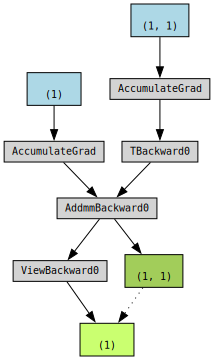

In [1]:
from torchviz import make_dot
import torch

from torch import nn

x=torch.tensor([1.])
model=nn.Linear(1,1) # 입력 node 한 개, 출력 node 한 개인 layer 만듬
print(model)

print(model.weight) # 만들면서 initialize 함
print(model.bias)
# 이때 파라미터를 보면 학습을 해야하는 값이므로 requires_grad가 true임

y=model(x)
print(y)

y2 = x @ model.weight + model.bias # 식으로 나타내 본다면..
print(y2)

make_dot(y)

Parameter containing:
tensor([[-0.9843],
        [ 0.1247],
        [ 0.7089]], requires_grad=True)
Parameter containing:
tensor([ 0.0939,  0.7118, -0.5405], requires_grad=True)
Parameter containing:
tensor([[0.3908, 0.3085, 0.0232]], requires_grad=True)
Parameter containing:
tensor([-0.2732], requires_grad=True)
tensor([-0.8904,  0.8365,  0.1684], grad_fn=<ViewBackward0>)
tensor([-0.3592], grad_fn=<ViewBackward0>)
tensor([-0.3592], grad_fn=<AddBackward0>)


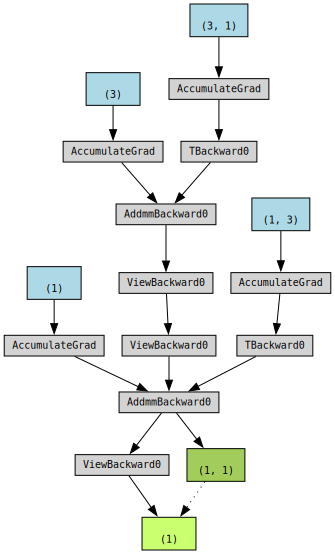

In [3]:
# 층 2개 쌓는 예시
fc1 = nn.Linear(1, 3) # fully-connected
fc2 = nn.Linear(3, 1)

print(fc1.weight) # weight 3개
print(fc1.bias)
# bias 역시 그 뉴런이 얼마나 예민하게 반응할지를 나타냄 역시 3개

print(fc2.weight) # weight 3개
print(fc2.bias) # 3개의 입력으로부터 얼마나 받을지 보니까 bias는 1개

x = torch.tensor([1.])
x = fc1(x)
print(x)
y = fc2(x)
print(y)

x = torch.tensor([1.])
y2 = (x @ fc1.weight.T + fc1.bias) @ fc2.weight.T + fc2.bias
# 입력2 출력3 일 경우 weight는 3x2로 저장됨 -> transpose를 해서 곱해야함
# 2x3이 아닌 3x2로 weight가 저장되는 이유는 batch를 통해 입력받기 때문
print(y2)

make_dot(y)


tensor([0.7997, 0.4900])
tensor([-0.5551, -0.1320, -0.5849], grad_fn=<ViewBackward0>)


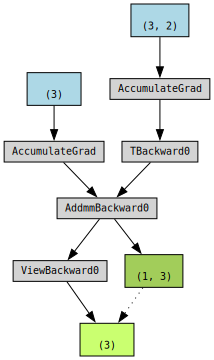

In [4]:
model = nn.Linear(2,3)
x = torch.randn(2)
print(x)
print(model(x))

# nn.Linear는 데이터의 shape의 마지막 차원이 '채널'(1D data) 들어오길 기대하는 녀석이다
# (입력 노드 하나가 곧 하나의 채널(피쳐) 값을 의미)
# '# 채널'은 'TV 채널'의 '채널' 같이 특정 유형의 정보를 전달하는 통로. 즉, 피쳐(특징)와 의미적으로 비슷함.
make_dot(model(x))

tensor([[-0.6208, -0.7549],
        [ 0.7287, -0.4240],
        [ 1.0923, -2.5664],
        [ 0.5839, -0.2325],
        [ 0.8679,  0.2783]])
tensor([[-0.0591,  1.0619, -0.5032],
        [-0.8240,  0.2973,  0.0038],
        [-2.1388,  0.7309,  0.7095],
        [-0.6292,  0.3143, -0.1085],
        [-0.5710,  0.0269, -0.1143]], grad_fn=<AddmmBackward0>)
torch.Size([4, 5, 3])
torch.Size([2, 3, 6, 4, 5, 3])


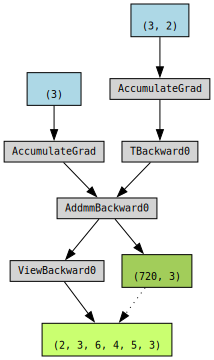

In [7]:
model = nn.Linear(2,3)
# 따라서, 데이터 여러 개를 통과시키고 싶다면 개x채의 형태로 줘야 함 ('채x개'나 '개' 이런식 X)
x=torch.randn(5,2) # 개x채 => 두 개의 채널 값(키, 몸무게)을 가지는 데이터(사람) 5개
print(x)
print(model(x))

x=torch.randn(4,5,2) # nn.Linear는 이거를 개x개x채로 들어왔다고 생각함
print(model(x).shape)

x = torch.randn(2,3,6,4,5,2)
print(model(x).shape)

make_dot(model(x))

tensor([-0.2794, -0.5580, -0.3189], grad_fn=<ViewBackward0>)
tensor([0.0717], grad_fn=<ViewBackward0>)
tensor([0.0717], grad_fn=<ViewBackward0>)


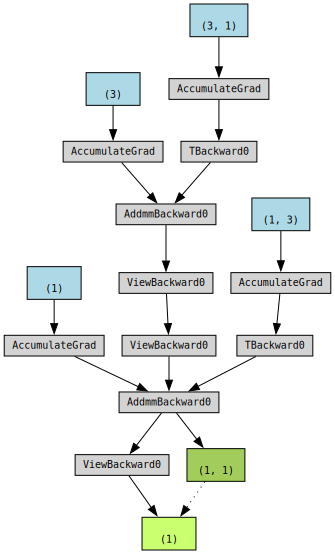

In [8]:
# Sequential -> 순서대로 레이어 쌓기
fc1 = nn.Linear(1, 3)
fc2 = nn.Linear(3, 1)

x = torch.tensor([1.])
x = fc1(x)
print(x)
x = fc2(x)
print(x)

model = nn.Sequential(fc1, fc2) # layer 펼침
x = torch.tensor([1.])
print(model(x))

make_dot(model(x)) # Sequential은 딱히 표시는 안 함

In [9]:
model = nn.Sequential(nn.Linear(2,5),
                      nn.Linear(5,10),
                      nn.Linear(10,3))

x=torch.randn(5,2)
print(x)
print(model(x))

tensor([[-0.9075,  0.7238],
        [ 0.9265, -0.1350],
        [ 3.2374,  1.2090],
        [ 1.4457, -0.0148],
        [ 0.5145, -0.0156]])
tensor([[ 0.4187, -0.0577,  0.1765],
        [-0.0981, -0.0733,  0.2084],
        [-0.3013,  0.0323,  0.1910],
        [-0.1773, -0.0589,  0.2088],
        [ 0.0044, -0.0736,  0.2029]], grad_fn=<AddmmBackward0>)


tensor([[0.3977, 0.4809, 0.3955],
        [0.3997, 0.4836, 0.3910],
        [0.4000, 0.4839, 0.3911],
        [0.3985, 0.4821, 0.3932],
        [0.3993, 0.4830, 0.3923]], grad_fn=<SigmoidBackward0>)


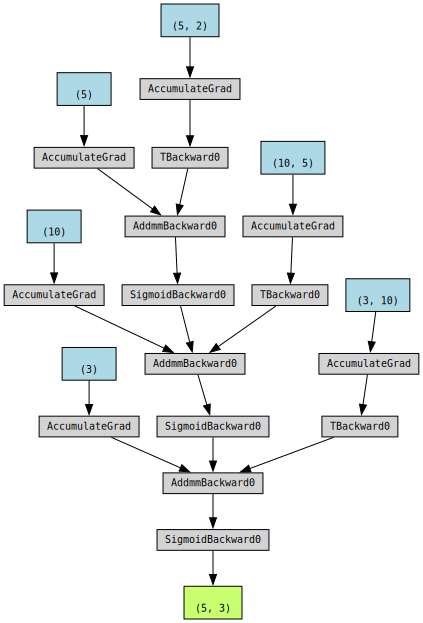

In [10]:
# 클래스로 모델 선언

class MyModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(2,5)
        self.fc2 = nn.Linear(5,10)
        self.fc3 = nn.Linear(10,3)
        self.act = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        x = self.act(x)
        x = self.fc3(x)
        x = self.act(x)
        return x

model = MyModel()
x = torch.randn(5,2)
y = model(x)
# model.forward(x) (nn.Module의 __call__에서
# forward를 통과시킴) (__call__은 인스턴스()로)
print(y)

make_dot(y)

In [11]:
print(model)
print(model.fc1.weight)
print(model.fc1.bias)

MyModel(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
  (act): Sigmoid()
)
Parameter containing:
tensor([[ 0.6739, -0.4053],
        [-0.6394,  0.2203],
        [-0.4322,  0.4833],
        [ 0.1897, -0.3491],
        [-0.0325,  0.2919]], requires_grad=True)
Parameter containing:
tensor([-0.2934,  0.1190,  0.4153, -0.3886, -0.2613], requires_grad=True)


In [13]:
list(model.parameters())
# .parameters -> transfer learning에서 파라미터 잠그거나, 수확인할때 사용

[Parameter containing:
 tensor([[ 0.6739, -0.4053],
         [-0.6394,  0.2203],
         [-0.4322,  0.4833],
         [ 0.1897, -0.3491],
         [-0.0325,  0.2919]], requires_grad=True),
 Parameter containing:
 tensor([-0.2934,  0.1190,  0.4153, -0.3886, -0.2613], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2019,  0.0383,  0.1597, -0.2414,  0.0455],
         [-0.1743,  0.0778,  0.0008, -0.4334, -0.3257],
         [-0.1117,  0.3290, -0.0396, -0.3705,  0.4459],
         [ 0.1509, -0.3219,  0.0732, -0.2353, -0.1193],
         [-0.3843,  0.1530, -0.2529, -0.3468,  0.2432],
         [-0.2970,  0.2441,  0.0551, -0.1705, -0.3547],
         [ 0.4258,  0.2240, -0.0948, -0.2817,  0.0156],
         [-0.1226,  0.0490,  0.2849, -0.0828, -0.2962],
         [ 0.3013, -0.4312, -0.0090,  0.0798, -0.3549],
         [ 0.2632, -0.4335,  0.3058,  0.4364,  0.0213]], requires_grad=True),
 Parameter containing:
 tensor([-0.2972,  0.1543, -0.3362, -0.4387,  0.3085, -0.3897, -0.2011, -0.3501,
  

In [14]:
# 파라미터 수 구하기
num = sum([p.numel() for p in model.parameters() if p.requires_grad])
print(num)

108


### 딥러닝 학습 예제

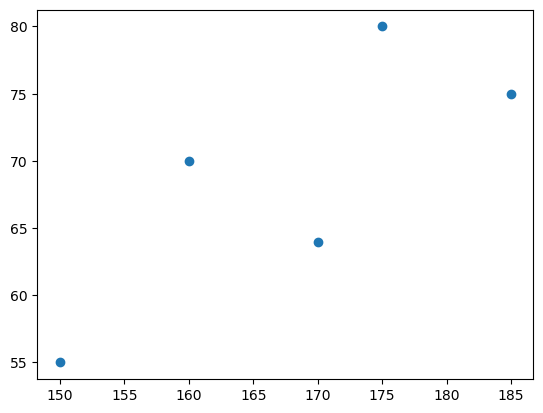

In [15]:
# 키와 몸무게 예시
import torch
import matplotlib.pyplot as plt

x = torch.tensor([150, 160, 170, 175, 185.]) # 키
y = torch.tensor([55, 70, 64, 80, 75.]) # 몸무게
N = len(x)
plt.plot(x, y, 'o')

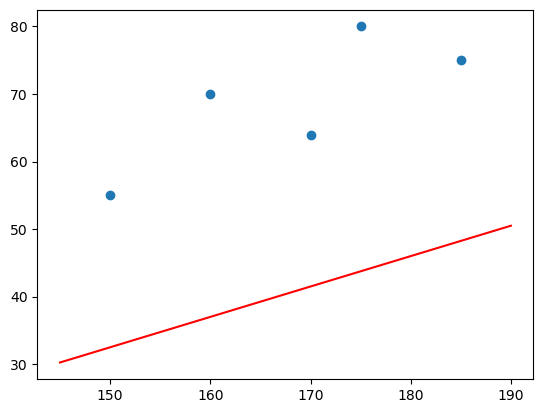

In [16]:
# 초깃값 설정
a = 0.45
b = -35
x_plot = torch.linspace(145, 190, 100)
# 그림그릴때 145부터 190까지 100단위로
y_plot = a * x_plot + b

plt.plot(x, y, 'o')
plt.plot(x_plot, y_plot, 'r')


(0.0, 1000.0)

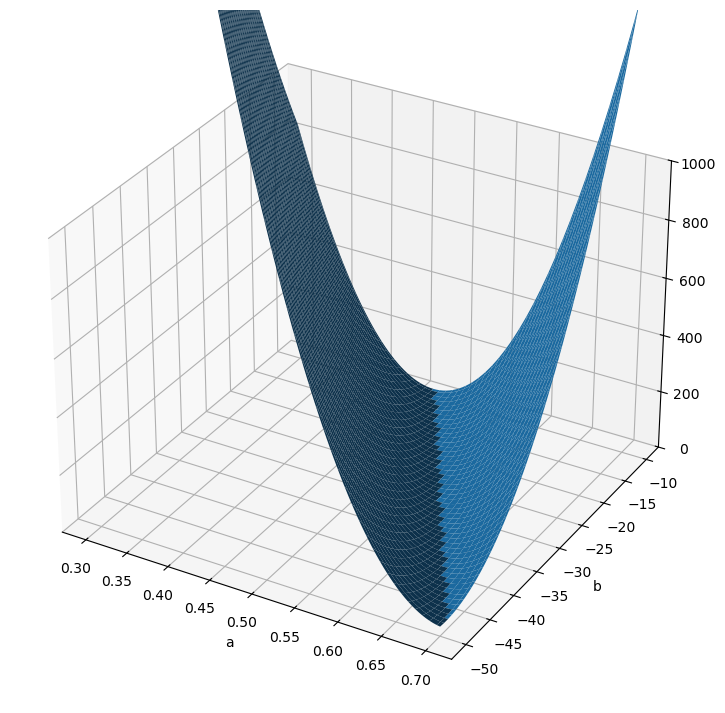

In [19]:
# a,b 를 바꿔가면서 Loss 값을 일일히 구해서 가장 작아지게 하는 a,b를 선정

a = 0.5 + torch.linspace(-0.2, 0.2, 100)
b = -30 + torch.linspace(-20, 20, 100)

L = torch.zeros(len(b), len(a))
for i in range(len(b)):
    for j in range(len(a)):
        for n in range(N):
            L[i,j] = L[i,j] + (y[n] - (a[j]*x[n]+b[i]))**2
            # 실제값 - 예측값
L = L/N # MSE

plt.figure(figsize=[10, 9])
ax = plt.axes(projection="3d")
A, B = torch.meshgrid(a, b, indexing='xy')
ax.plot_surface(A,B,L)
ax.set_xlabel('a'); ax.set_ylabel('b')
ax.set_zlim([0, 1000])

In [18]:
L

tensor([[4717.8999, 4625.1914, 4533.4097,  ...,   37.8939,   35.0339,
           33.1000],
        [4662.7900, 4570.6304, 4479.3970,  ...,   35.9905,   33.6789,
           32.2935],
        [4608.0068, 4516.3955, 4425.7109,  ...,   34.4135,   32.6504,
           31.8136],
        ...,
        [ 892.4518,  852.9494,  814.3732,  ..., 1373.4280, 1423.7732,
         1475.0457],
        [ 869.0127,  830.0588,  792.0311,  ..., 1403.1949, 1454.0889,
         1505.9099],
        [ 845.8998,  807.4945,  770.0153,  ..., 1433.2881, 1484.7303,
         1537.1000]])

In [20]:
print(torch.min(L))
a_opt = A[L==torch.min(L)]
b_opt = B[L==torch.min(L)]
print(f"optimal a = {a_opt}")
print(f"optimal b = {b_opt}")

tensor(29.0315)
optimal a = tensor([0.5626])
optimal b = tensor([-25.7576])


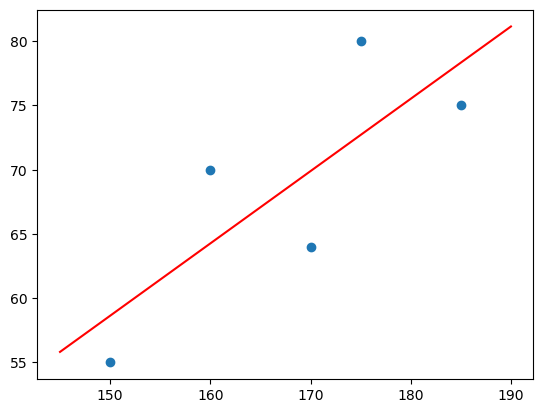

In [21]:
x_plot=torch.linspace(145,190,100)
y_plot=a_opt * x_plot + b_opt
plt.plot(x,y,'o')
plt.plot(x_plot,y_plot,'r')

In [26]:
# 모델 파라미터 초기화
a = torch.tensor([.45], requires_grad=True)
b = torch.tensor([-35.], requires_grad=True)

# 하이퍼파라미터 설정
LR = 3e-6
EPOCH = 20

loss_history = []

for ep in range(EPOCH):
    # inference
    y_hat = a * x + b
    # loss
    loss = 0
    for n in range(N):
        loss += (y[n] - y_hat[n])**2
    loss = loss/N # MSE

    # update
    loss.backward() # backpropagation
    with torch.no_grad():
        a -= LR * a.grad # weight update
        b -= LR * b.grad # weight update
    a.grad = torch.tensor([0.]) # gradient 초기화
    b.grad = torch.tensor([0.]) # gradient 초기화
    # print loss
    loss_history += [loss.item()]
    print(f"Epoch: {ep+1}, train loss: {loss.item():.4f}")
    # print weight and bias
    # print(f"Weight: {a.item():.4f}, Bias: {b.item():.4f}")
    # plot graph
    # x_plot = torch.linspace(145, 190, 100)
    # y_plot = a.detach() * x_plot + b.detach()
    # plt.figure()
    # plt.plot(x, y, 'o')
    # plt.plot(x_plot, y_plot, 'r')
    # plt.title(f"Epoch {ep+1}")
    # plt.show()

Epoch: 1, train loss: 826.2250
Epoch: 2, train loss: 578.0414
Epoch: 3, train loss: 407.1602
Epoch: 4, train loss: 289.5042
Epoch: 5, train loss: 208.4954
Epoch: 6, train loss: 152.7187
Epoch: 7, train loss: 114.3153
Epoch: 8, train loss: 87.8735
Epoch: 9, train loss: 69.6676
Epoch: 10, train loss: 57.1324
Epoch: 11, train loss: 48.5017
Epoch: 12, train loss: 42.5591
Epoch: 13, train loss: 38.4676
Epoch: 14, train loss: 35.6504
Epoch: 15, train loss: 33.7107
Epoch: 16, train loss: 32.3752
Epoch: 17, train loss: 31.4557
Epoch: 18, train loss: 30.8226
Epoch: 19, train loss: 30.3866
Epoch: 20, train loss: 30.0865


In [27]:
# .grad 초기화 필요한 이유 실험
z = torch.tensor([1.], requires_grad=True)
for _ in range(2):
    loss = z**2
    loss.backward()
    print(z.grad)
    # z.grad = torch.tensor([0.])
    # print(z.grad)

    # 값이 backward하면 매번 누적함 -> 즉 에폭마다 초기화필요

tensor([2.])
tensor([4.])


Text(0.5, 1.0, 'Training Loss')

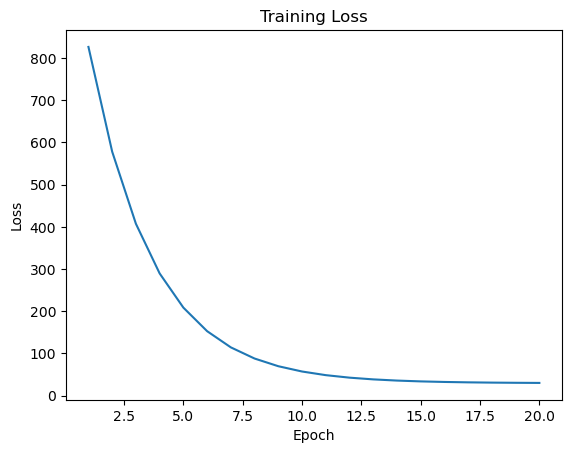

In [28]:
# plot loss_history
plt.plot(range(1, EPOCH+1), loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")

In [31]:
from torch import nn, optim

x = x.reshape(-1, 1) # 개체 형태로 바꿔줌

model = nn.Linear(1, 1)
model.weight.data = torch.tensor([[0.45]])
model.bias.data = torch.tensor([-35.])

LR = 3e-6
EPOCH = 20
optimizer = optim.SGD(model.parameters(), lr=LR)
criterion = nn.MSELoss()

loss_history = []

for ep in range(EPOCH):
    # inference
    y_hat = model(x)
    # loss
    loss = criterion(y_hat, y)
    # update
    optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
    loss.backward() # backpropagation
    optimizer.step() # weight update
    # print loss
    loss_history += [loss.item()]
    print(f"Epoch: {ep+1}, train loss: {loss.item():.4f}")
    # print weight and bias
    # print(f"Weight: {model.weight.data.item():.4f}, Bias: {model.bias.data.item():.4f}")
    # plot graph
    # x_plot = torch.linspace(145, 190, 100)
    # y_plot = model.weight.squeeze().detach() * x_plot + model.bias.detach()
    # plt.figure()
    # plt.plot(x, y, 'o')
    # plt.plot(x_plot, y_plot, 'r')
    # plt.title(f"Epoch {ep+1}")
    # plt.show()

print("--"*20)

# 여기서 핵심 코드 4개
# 1. model(x) -> 추론
# 2. loss = criterion(y_hat,y)
# 3. loss.backward()
# 4. optimizer().step()

Epoch: 1, train loss: 900.5650
Epoch: 2, train loss: 660.9294
Epoch: 3, train loss: 495.9343
Epoch: 4, train loss: 382.3307
Epoch: 5, train loss: 304.1121
Epoch: 6, train loss: 250.2566
Epoch: 7, train loss: 213.1756
Epoch: 8, train loss: 187.6445
Epoch: 9, train loss: 170.0657
Epoch: 10, train loss: 157.9622
Epoch: 11, train loss: 149.6288
Epoch: 12, train loss: 143.8909
Epoch: 13, train loss: 139.9402
Epoch: 14, train loss: 137.2202
Epoch: 15, train loss: 135.3472
Epoch: 16, train loss: 134.0578
Epoch: 17, train loss: 133.1698
Epoch: 18, train loss: 132.5586
Epoch: 19, train loss: 132.1376
Epoch: 20, train loss: 131.8478
----------------------------------------


Text(0.5, 1.0, 'Training Loss')

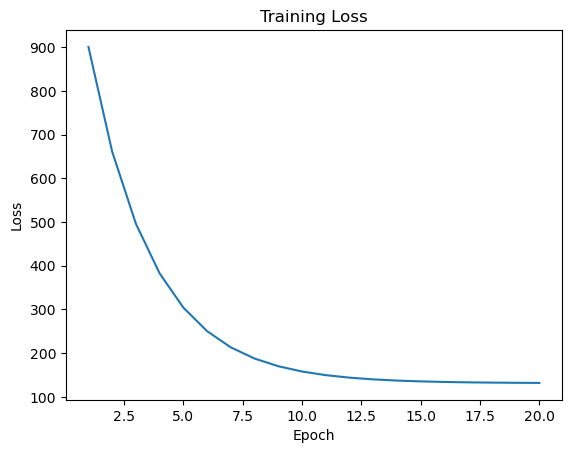

In [32]:
# plot loss_history
plt.plot(range(1, EPOCH+1), loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")